<a href="https://colab.research.google.com/github/bn2022/Human-Gait-Recognition-Using-Bag-of-Words-Feature-Representation-Method/blob/main/Copy_of_Copy_of_pytorch_unet_resnet18_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## pytorch-uent

https://github.com/usuyama/pytorch-unet

In [1]:
import os

if not os.path.exists("pytorch_unet.py"):
  if not os.path.exists("pytorch_unet"):
    !git clone https://github.com/usuyama/pytorch-unet.git

  %cd pytorch-unet

Cloning into 'pytorch-unet'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 67 (delta 6), reused 1 (delta 0), pack-reused 55
Unpacking objects: 100% (67/67), done.
/content/pytorch-unet


In [2]:
!ls

helper.py  pytorch_fcn.ipynb		pytorch_unet_resnet18_colab.ipynb
images	   pytorch_resnet18_unet.ipynb	README.md
LICENSE    pytorch_unet.ipynb		simulation.py
loss.py    pytorch_unet.py


## Enabling GPU on Colab

Need to enable GPU from Notebook settings

- Navigate to Edit-Notebook settings menu
- Select GPU from the Hardware Accelerator dropdown list


In [3]:
import torch

if not torch.cuda.is_available():
  raise Exception("GPU not availalbe. CPU training will be too slow.")

print("device name", torch.cuda.get_device_name(0))

device name Tesla T4


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import helper
import simulation
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [81]:
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import walk
import io
from imageio import imread
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image
class BottlesDataset(Dataset):
    """Bottles dataset."""

    def __init__(self, root, transforms=None):
        """
        Args:
            
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        
        # self.landmarks_frame = pd.read_csv(csv_file)
        self.root = root
        self.transforms = transforms
        self.imgs = list(sorted(os.listdir(os.path.join(root, "Images"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "maskpng"))))
        # print(self.masks)
        # print(len(self.masks))
        # filenames = next(walk(root_dir_mask), (None, None, []))[2] 
        
        # self.filepaths = []
        # for i in filenames:
            
        #     exr3 = root_dir_mask +'/'+i
        #     self.filepaths.append(exr3)
        # filenames_image = next(walk(root_dir_image), (None, None, []))[2] 
        # self.filepaths_image = []
        # for i in filenames_image:
    
        #     exr5 = root_dir_image +'/'+i
        #     self.filepaths_image.append(exr5)
    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        # if torch.is_tensor(idx):
        #     idx = idx.tolist()
        img_name = os.path.join(self.root, "Images", self.imgs[idx])
        img_name_image = os.path.join(self.root, "maskpng", self.masks[idx])
        
        # img_name = self.filepaths[idx] 
        # img_name_image = self.filepaths_image[idx]       
        # image = imread(img_name,plugin='matplotlib')
        # image_image = imread(img_name_image,plugin='matplotlib')
        # landmarks = self.landmarks_frame.iloc[idx, 1:]
        # landmarks = np.array([landmarks])
        # landmarks = landmarks.astype('float').reshape(-1, 2)
        # sample = {'image': image_image, 'mask': image}
        
    
        img = Image.open(img_name_image)
        img = img.resize((512, 512),resample=1)
        img = img.convert("RGB")
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = Image.open(img_name)
        
        mask = mask.resize((512, 512),resample=1)
        mask = np.array(mask)
        img = np.array(img)
        print(np.size(img))
        # img = np.resize(img, (1080, 1080, 3))
        # mask = np.resize(mask, (1080, 1080, 4))

        img = np.swapaxes(img, 0, 2)
        img = np.swapaxes(img, 1, 2)
        mask = np.swapaxes(mask, 0, 2)
        mask = np.swapaxes(mask, 1, 2)
        mask = mask.astype(float)
        img = img.astype(float)

        # mask = np.expand_dims(mask, axis=0)
        # print(mask.shape)
        # print(img.shape)
        return [img, mask]

        # # instances are encoded as different colors
        # obj_ids = np.unique(mask)
        # # first id is the background, so remove it
        # obj_ids = obj_ids[1:]
        # print(obj_ids)
        # # split the color-encoded mask into a set
        # # of binary masks
        # masks = mask == obj_ids[:, None, None]


        # # get bounding box coordinates for each mask
        # num_objs = len(obj_ids)
        # boxes = []
        # for i in range(num_objs):
        #     pos = np.where(masks[i])
        #     xmin = np.min(pos[1])
        #     xmax = np.max(pos[1])
        #     ymin = np.min(pos[0])
        #     ymax = np.max(pos[0])
        #     boxes.append([xmin, ymin, xmax, ymax])

        # boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # # there is only one class
        # labels = torch.ones((num_objs,), dtype=torch.int64)
        # masks = torch.as_tensor(masks, dtype=torch.uint8)

        # image_id = torch.tensor([idx])
        # area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # # suppose all instances are not crowd
        # iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        # target = {}
        # target["boxes"] = boxes
        # target["labels"] = labels
        # target["masks"] = masks
        # target["image_id"] = image_id
        # target["area"] = area
        # target["iscrowd"] = iscrowd

        # if self.transforms is not None:
        #     img, target = self.transforms(img, target)

        # return img, target

## Prepare Dataset and DataLoader

In [82]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models
root = '/content/drive/MyDrive/Colab Notebooks/CameraTop/'
class SimDataset(Dataset):
  def __init__(self, count, transform=None):
    self.input_images, self.target_masks = simulation.generate_random_data(192, 192, count=count)
    self.transform = transform

  def __len__(self):
    return len(self.input_images)

  def __getitem__(self, idx):
    image = self.input_images[idx]
    mask = self.target_masks[idx]
    if self.transform:
      image = self.transform(image)

    return [image, mask]

# use the same transformations for train/val in this example
trans = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
])

# train_set = SimDataset(2000, transform = trans)
train_set = BottlesDataset(root, transforms=trans)
# val_set = SimDataset(200, transform = trans)
val_set = BottlesDataset(root,transforms=trans)
image_datasets = {
  'train': train_set, 'val': val_set
}

batch_size = 1

dataloaders = {
  'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
  'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
}

## Check the outputs from DataLoader

786432
torch.Size([1, 3, 512, 512]) torch.Size([1, 4, 512, 512])


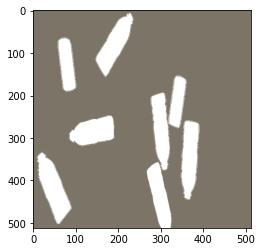

In [83]:
import torchvision.utils

def reverse_transform(inp):
  # inp = torch.squeeze(inp)
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  inp = (inp * 255).astype(np.uint8)

  return inp

# Get a batch of training data
inputs, masks = next(iter(dataloaders['train']))

print(inputs.shape, masks.shape)

plt.imshow(reverse_transform(inputs[0]))

# Define a UNet module

In [84]:
import torch.nn as nn
import torchvision.models


def convrelu(in_channels, out_channels, kernel, padding):
  return nn.Sequential(
    nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
    nn.ReLU(inplace=True),
  )


class ResNetUNet(nn.Module):
  def __init__(self, n_class):
    super().__init__()

    self.base_model = torchvision.models.resnet18(pretrained=True)
    self.base_layers = list(self.base_model.children())

    self.layer0 = nn.Sequential(*self.base_layers[:3]) # size=(N, 64, x.H/2, x.W/2)
    self.layer0_1x1 = convrelu(64, 64, 1, 0)
    self.layer1 = nn.Sequential(*self.base_layers[3:5]) # size=(N, 64, x.H/4, x.W/4)
    self.layer1_1x1 = convrelu(64, 64, 1, 0)
    self.layer2 = self.base_layers[5]  # size=(N, 128, x.H/8, x.W/8)
    self.layer2_1x1 = convrelu(128, 128, 1, 0)
    self.layer3 = self.base_layers[6]  # size=(N, 256, x.H/16, x.W/16)
    self.layer3_1x1 = convrelu(256, 256, 1, 0)
    self.layer4 = self.base_layers[7]  # size=(N, 512, x.H/32, x.W/32)
    self.layer4_1x1 = convrelu(512, 512, 1, 0)

    self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

    self.conv_up3 = convrelu(256 + 512, 512, 3, 1)
    self.conv_up2 = convrelu(128 + 512, 256, 3, 1)
    self.conv_up1 = convrelu(64 + 256, 256, 3, 1)
    self.conv_up0 = convrelu(64 + 256, 128, 3, 1)

    self.conv_original_size0 = convrelu(3, 64, 3, 1)
    self.conv_original_size1 = convrelu(64, 64, 3, 1)
    self.conv_original_size2 = convrelu(64 + 128, 64, 3, 1)

    self.conv_last = nn.Conv2d(64, n_class, 1)

  def forward(self, input):
    x_original = self.conv_original_size0(input)
    x_original = self.conv_original_size1(x_original)

    layer0 = self.layer0(input)
    layer1 = self.layer1(layer0)
    layer2 = self.layer2(layer1)
    layer3 = self.layer3(layer2)
    layer4 = self.layer4(layer3)

    layer4 = self.layer4_1x1(layer4)
    x = self.upsample(layer4)
    layer3 = self.layer3_1x1(layer3)
    x = torch.cat([x, layer3], dim=1)
    x = self.conv_up3(x)

    x = self.upsample(x)
    layer2 = self.layer2_1x1(layer2)
    x = torch.cat([x, layer2], dim=1)
    x = self.conv_up2(x)

    x = self.upsample(x)
    layer1 = self.layer1_1x1(layer1)
    x = torch.cat([x, layer1], dim=1)
    x = self.conv_up1(x)

    x = self.upsample(x)
    layer0 = self.layer0_1x1(layer0)
    x = torch.cat([x, layer0], dim=1)
    x = self.conv_up0(x)

    x = self.upsample(x)
    x = torch.cat([x, x_original], dim=1)
    x = self.conv_original_size2(x)

    out = self.conv_last(x)

    return out

## Instantiate the UNet model

- Move the model to GPU if available
- Show model summaries

In [85]:
import torch
import torch.nn as nn
import pytorch_unet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device', device)

model = ResNetUNet(6)
model = model.to(device)

device cuda


In [86]:
model

ResNetUNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [87]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
            Conv2d-5         [-1, 64, 112, 112]           9,408
            Conv2d-6         [-1, 64, 112, 112]           9,408
       BatchNorm2d-7         [-1, 64, 112, 112]             128
       BatchNorm2d-8         [-1, 64, 112, 112]             128
              ReLU-9         [-1, 64, 112, 112]               0
             ReLU-10         [-1, 64, 112, 112]               0
        MaxPool2d-11           [-1, 64, 56, 56]               0
        MaxPool2d-12           [-1, 64, 56, 56]               0
           Conv2d-13           [-1, 64, 56, 56]          36,864
           Conv2d-14           [-1, 64,

# Define the main training loop

In [88]:
from collections import defaultdict
import torch.nn.functional as F
from loss import dice_loss

checkpoint_path = "checkpoint.pth"

def calc_loss(pred, target, metrics, bce_weight=0.5):
    bce = F.binary_cross_entropy_with_logits(pred, target)

    pred = torch.sigmoid(pred)
    dice = dice_loss(pred, target)

    loss = bce * bce_weight + dice * (1 - bce_weight)

    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)

    return loss

def print_metrics(metrics, epoch_samples, phase):
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))

    print("{}: {}".format(phase, ", ".join(outputs)))

def train_model(model, optimizer, scheduler, num_epochs=25):
    best_loss = 1e10

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        since = time.time()

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            metrics = defaultdict(float)
            epoch_samples = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device).float()
                labels = labels.to(device).float()
                print(inputs.shape)
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = calc_loss(outputs, labels, metrics)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                epoch_samples += inputs.size(0)

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples

            if phase == 'train':
              scheduler.step()
              for param_group in optimizer.param_groups:
                  print("LR", param_group['lr'])

            # save the model weights
            if phase == 'val' and epoch_loss < best_loss:
                print(f"saving best model to {checkpoint_path}")
                best_loss = epoch_loss
                torch.save(model.state_dict(), checkpoint_path)

        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(torch.load(checkpoint_path))
    return model

## Training

In [89]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import time
torch.cuda.empty_cache()


num_class = 4
model = ResNetUNet(num_class).to(device)

# freeze backbone layers
for l in model.base_layers:
  for param in l.parameters():
    param.requires_grad = False

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=8, gamma=0.1)


model = train_model(model, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Streaming output truncated to the last 5000 lines.
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.Size([1, 3, 512, 512])
786432
torch.

## Predict new images using the trained model

In [90]:
import math

model.eval()   # Set model to the evaluation mode

# Create a new simulation dataset for testing
test_dataset = BottlesDataset(root, transforms = trans)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0)

# Get the first batch
inputs, labels = next(iter(test_loader))
inputs, labels = next(iter(test_loader))
inputs, labels = next(iter(test_loader))
inputs = inputs.to(device).float()
labels = labels.to(device).float()
print('inputs.shape', inputs.shape)
print('labels.shape', labels.shape)

# Predict
pred = model(inputs)
# The loss functions include the sigmoid function.
pred = torch.sigmoid(pred)
pred = pred.data.cpu().numpy()
# pred = pred[:,1:,:,:]

print('pred.shape', pred.shape)

# Change channel-order and make 3 channels for matplot
input_images_rgb = [reverse_transform(x) for x in inputs.cpu()]

# Map each channel (i.e. class) to each color
# target_masks_rgb = [helper.masks_to_colorimg(x) for x in labels.cpu().numpy()]
target_masks_rgb = [x.transpose((1, 2, 0)) for x in labels.cpu().numpy()]
# target_masks_rgb = target_masks_rgb.numpy().transpose((1, 2, 0))
pred_rgb = [x.transpose((1, 2, 0)) for x in pred]

786432
786432
786432
inputs.shape torch.Size([1, 3, 512, 512])
labels.shape torch.Size([1, 4, 512, 512])
pred.shape (1, 4, 512, 512)


## Left: Input image, Middle: Correct mask (Ground-truth), Rigth: Predicted mask

1
1
1
(512, 512, 4)


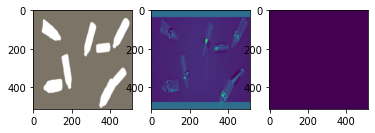

In [91]:
# helper.plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb])
print(len(input_images_rgb))
print(len(target_masks_rgb))
print(len(pred_rgb))
print(pred_rgb[0].shape)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(input_images_rgb[0])
axarr[1].imshow(target_masks_rgb[0][:,:,1])
axarr[2].imshow(pred_rgb[0][:,:,1])
# axarr[1,1].imshow(image_datas[3])

## Next steps

Try tweaking the hyper-parameters for better accuracy e.g.

- learning rates and schedules
- loss weights
- unfreezing layers
- batch size
- etc.